# Computer Vision and OpenCV
- Course: Self Driving Car Nanodegree
- Lesson: Advanced Lane Finding
- Topic: Direction of the Gradient

    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel in the X axis:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

    # Sobel in the Y axis:
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    # Absolute value from the x derivative
    abs_sobelx = np.absolute(sobelx)
    
    # Absolute value from the x derivative
    abs_sobely = np.absolute(sobely)
    
    ########## Gradient direction in radians ##############################
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    
    # Convert absolute value image to 8-bit 
    scaled_<measure> = np.uint8(255 * <measure> / np.max(<measure>))
    
    # Apply min max thresholds and convert to 0 if not in the range and 1 if within the range
    binary_output = np.zeros_like(scaled_<measure>)
    binary_output[(scaled_<measure> >= thresh_min) & (scaled_<measure> <= thresh_max)] = 1
    
    # Plot grayscale output
    plt.imshow(binary_output, cmap='gray')

Sobel operator allows to calculate the image derivative in X or Y axis. It can be used to identify horizontal or vertical lines at an image. The direction of the gradient can be used to identify the object orientation also. 

The example below present a pipeline to apply a threshold to the direction of the gradient.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image
image = mpimg.imread('13-input-imgCenterCamera-xygrad.jpg')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(dir_gradient)
    binary_output[(dir_gradient >= thresh[0]) & (dir_gradient <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

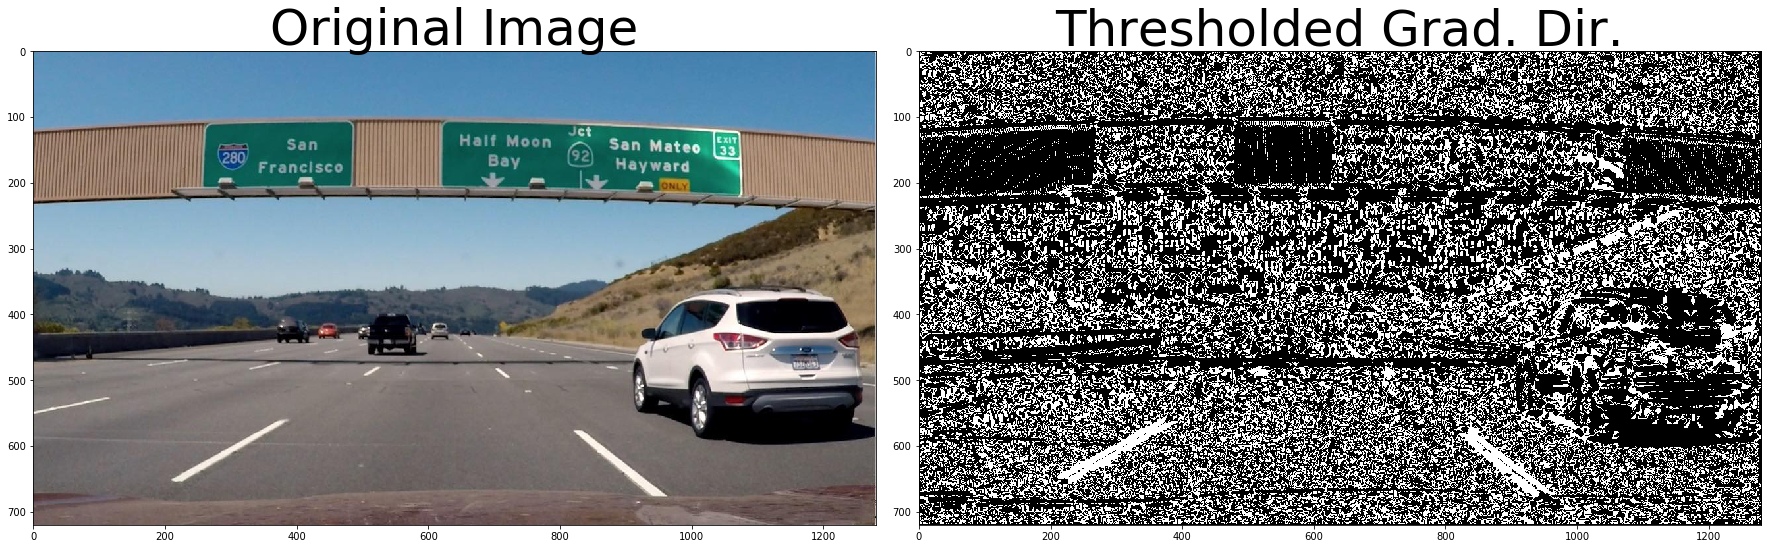

In [8]:
def plotResult():
    global image
    # Run the function
    dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(dir_binary, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
# Result with Udacity parameters
plotResult() 

In [9]:
def plotResultTest(image, sobel_kernel, thresh):
    binary_output = dir_threshold(image, sobel_kernel, thresh)
    f, ax = plt.subplots(1, 1)
    ax.imshow(binary_output, cmap='gray')
    ax.set_title('Thresholded {} - {} / Kernel {}'.format(thresh[0], thresh[1], sobel_kernel))
    plt.show()

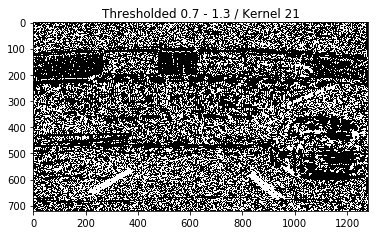

In [39]:
plotResultTest(image, 21, (0.7, 1.3))